# Vizualizing BigQuery data in a Jupyter notebook

[BigQuery](https://cloud.google.com/bigquery/docs/) is a petabyte-scale analytics data warehouse that you can use to run SQL queries over vast amounts of data in near real time.
Data visualization tools can help you make sense of your BigQuery data and help you analyze the data interactively. You can use visualization tools to help you identify trends, respond to them, and make predictions using your data. In this tutorial, you use the BigQuery Python client library and pandas in a Jupyter notebook to visualize data.
We’ll use Airline On Time Performance data, a 70 million row data set from the U.S. Bureau of Transportation statistics, that is available to all users in BigQuery as the airline_ontime_data.flights data set

## Using BigQuery magic
The following example shows how to invoke the magic (`%%bigquery`), and how to pass in a standard SQL query in the body of the code cell. The results are displayed below the input cell as a pandas [`DataFrame`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [20]:
project_id = 'your-project-id' # change to your project id

As the query job is running, status messages below the cell update with the query job ID and the amount of time the query has been running. By default, this output is erased and replaced with the results of the query. If you pass the `--verbose` flag, the output will remain below the cell after query completion. Run the following cell to see what happens.

In [1]:
%%bigquery --verbose

SELECT 
    CAST(date AS DATE) AS flight_date, 
    FORMAT_DATE('%b',  CAST(date AS DATE)) AS flight_month, 
    EXTRACT(DAY FROM CAST(date AS DATE)) AS flight_day, 
    FORMAT_DATE('%a',  CAST(date AS DATE)) AS flight_day_of_week, 
    airline,
    departure_airport,
    arrival_airport,
    CAST(SUBSTR(LPAD(CAST(departure_schedule AS STRING), 4, '0'), 0, 2) AS INT64) AS departure_schedule_hour, 
    CAST(SUBSTR(LPAD(CAST(departure_schedule AS STRING), 4, '0'), 3, 2) AS INT64) AS departure_schedule_minute, 
    CASE 
        WHEN departure_schedule BETWEEN 600 AND 900 THEN '[6:00am - 9:00am]'
        WHEN departure_schedule BETWEEN 900 AND 1200 THEN '[9:00am - 12:pm]'
        WHEN departure_schedule BETWEEN 1200 AND 1500 THEN '[12:00pm - 3:00pm]'
        WHEN departure_schedule BETWEEN 1500 AND 1800 THEN '[3:00pm - 6:00pm]'
        WHEN departure_schedule BETWEEN 1800 AND 2100 THEN '[6:00pm - 9:00pm]'
        WHEN departure_schedule BETWEEN 2100 AND 2400 THEN '[9:00pm - 12:00am]'
        ELSE '[12:00am - 6:00am]'
    END AS departure_time_slot,
    departure_delay,
    arrival_delay
FROM 
    `bigquery-samples.airline_ontime_data.flights`
LIMIT 5

Executing query with job ID: ca9d97d4-a100-46f4-a6a1-42313344dd7d
Query executing: 1.70s
Query complete after 1.98s


,flight_date,flight_month,flight_day,flight_day_of_week,airline,departure_airport,arrival_airport,departure_schedule_hour,departure_schedule_minute,departure_time_slot,departure_delay,arrival_delay
0,2006-08-20,Aug,20,Sun,KH,HNL,KOA,17,25,[3:00pm - 6:00pm],-2.0,-3.0
1,2006-08-19,Aug,19,Sat,KH,HNL,KOA,17,25,[3:00pm - 6:00pm],-6.0,-9.0
2,2006-08-18,Aug,18,Fri,KH,HNL,KOA,17,25,[3:00pm - 6:00pm],-1.0,-6.0
3,2006-08-17,Aug,17,Thu,KH,HNL,KOA,17,25,[3:00pm - 6:00pm],-3.0,-4.0
4,2006-08-16,Aug,16,Wed,KH,HNL,KOA,17,25,[3:00pm - 6:00pm],-6.0,-12.0


The following cell runs the same query, but this time the results are saved to a variable. The variable name, `total_flights`, is given as an argument to the `%%bigquery`. The results can then be used for further analysis and visualization. Run the cell and check what happens.

In [2]:
%%bigquery --verbose total_flights

SELECT 
    CAST(date AS DATE) AS flight_date, 
    FORMAT_DATE('%b',  CAST(date AS DATE)) AS flight_month, 
    EXTRACT(DAY FROM CAST(date AS DATE)) AS flight_day, 
    FORMAT_DATE('%a',  CAST(date AS DATE)) AS flight_day_of_week, 
    airline,
    departure_airport,
    arrival_airport,
    CAST(SUBSTR(LPAD(CAST(departure_schedule AS STRING), 4, '0'), 0, 2) AS INT64) AS departure_schedule_hour, 
    CAST(SUBSTR(LPAD(CAST(departure_schedule AS STRING), 4, '0'), 3, 2) AS INT64) AS departure_schedule_minute, 
    CASE 
        WHEN departure_schedule BETWEEN 600 AND 900 THEN '[6:00am - 9:00am]'
        WHEN departure_schedule BETWEEN 900 AND 1200 THEN '[9:00am - 12:pm]'
        WHEN departure_schedule BETWEEN 1200 AND 1500 THEN '[12:00pm - 3:00pm]'
        WHEN departure_schedule BETWEEN 1500 AND 1800 THEN '[3:00pm - 6:00pm]'
        WHEN departure_schedule BETWEEN 1800 AND 2100 THEN '[6:00pm - 9:00pm]'
        WHEN departure_schedule BETWEEN 2100 AND 2400 THEN '[9:00pm - 12:00am]'
        ELSE '[12:00am - 6:00am]'
    END AS departure_time_slot,
    departure_delay,
    arrival_delay
FROM 
    `bigquery-samples.airline_ontime_data.flights`
LIMIT 50000

Executing query with job ID: 258d8e0e-939b-4651-9a2e-fbf08557b0af
Query executing: 0.36s
Query complete after 0.80s


The next cell uses the pandas `DataFrame.describe` method to visualize the query results in the variable as a bar chart. See the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) to learn more about data visualization with pandas.

In [2]:
total_flights.describe()

,flight_day,departure_schedule_hour,departure_schedule_minute,departure_delay,arrival_delay
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,15.715840,14.414100,27.222920,10.914460,10.036460
std,8.818905,4.529048,15.800759,36.042998,39.323356
min,1.000000,2.000000,0.000000,-46.000000,-58.000000
25%,8.000000,11.000000,15.000000,-4.000000,-10.000000
50%,16.000000,14.000000,25.000000,0.000000,1.000000
75%,23.000000,19.000000,40.000000,10.000000,17.000000
max,31.000000,23.000000,59.000000,1100.000000,1096.000000


## Exercise 1: Which Airline has the most delays (on average)?

For this exercise you need to do:
+ First write a SQL query that GROUPS the average delays by airline. For this query use data from the years 2008-2012
+ Take the results of the query and plot the average delays per airline in a bar chart. 

Answers these questions:
+ Which Airline has the highest average delays from 2008-2012?
+ Do you notice anything strange?

Please write the query and the code to plot the bar chart in the two cells below. 

In [16]:
%%bigquery --verbose avg_delays

SELECT 
    airline,
    AVG(arrival_delay) AS delay 
FROM 
    (SELECT 
    CAST(date AS DATE) AS flight_date, 
    FORMAT_DATE('%b',  CAST(date AS DATE)) AS flight_month, 
    EXTRACT(DAY FROM CAST(date AS DATE)) AS flight_day, 
    EXTRACT(YEAR FROM CAST(date AS DATE)) AS flight_year,
    FORMAT_DATE('%a',  CAST(date AS DATE)) AS flight_day_of_week,
    airline, 
    arrival_delay
    FROM `bigquery-samples.airline_ontime_data.flights`)
WHERE flight_year BETWEEN 2008 AND 2012
GROUP BY airline
ORDER BY delay DESC

Executing query with job ID: 96bf3e14-7030-4c32-8857-dc4281a878d3
Query executing: 0.67s
Query complete after 0.91s


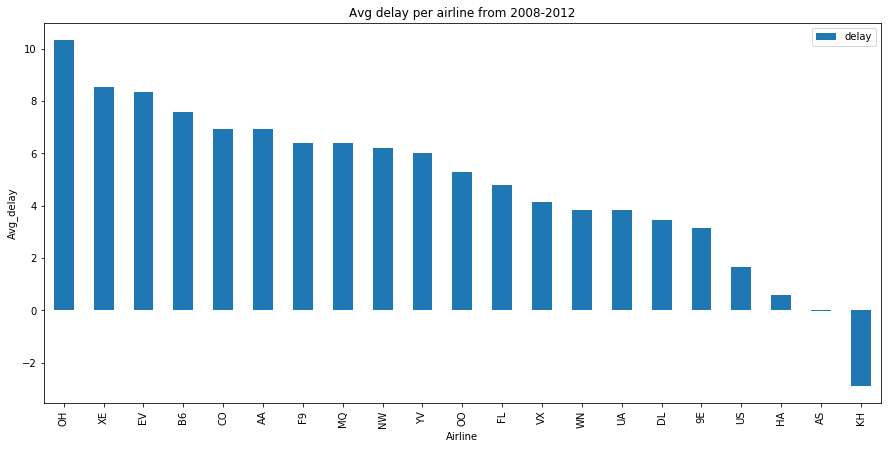

In [19]:
ax = avg_delays.plot(kind='bar', x='airline', y='delay', figsize=(15,7))
ax.set_title('Avg delay per airline from 2008-2012')
ax.set_xlabel('Airline')
ax.set_ylabel('Avg_delay');

## Using Python to query BigQuery data

Magic commands allow you to use minimal syntax to interact with BigQuery. Behind the scenes, `%%bigquery` uses the BigQuery Python client library to run the given query, convert the results to a pandas `Dataframe`, optionally save the results to a variable, and finally display the results. Using the BigQuery Python client library directly instead of through magic commands gives you more control over your queries and allows for more complex configurations. The library's integrations with pandas enable you to combine the power of declarative SQL with imperative code (Python) to perform interesting data analysis, visualization, and transformation tasks.

To use the BigQuery Python client library, start by importing the library and initializing a client. The BigQuery client is used to send and receive messages from the BigQuery API.

In [1]:
# import and set to use BigQuery Python client library
from google.cloud import bigquery

client = bigquery.Client()

In [12]:
sql = """
SELECT 
    airline,
    AVG(arrival_delay) AS delay 
FROM 
    (SELECT 
    CAST(date AS DATE) AS flight_date, 
    FORMAT_DATE('%b',  CAST(date AS DATE)) AS flight_month, 
    EXTRACT(DAY FROM CAST(date AS DATE)) AS flight_day, 
    EXTRACT(YEAR FROM CAST(date AS DATE)) AS flight_year,
    FORMAT_DATE('%a',  CAST(date AS DATE)) AS flight_day_of_week,
    airline, 
    arrival_delay
    FROM `bigquery-samples.airline_ontime_data.flights`)
WHERE flight_year BETWEEN 2008 AND 2012
GROUP BY airline
ORDER BY delay DESC
"""
df = client.query(sql).to_dataframe()
df.head()

,airline,delay
0,OH,10.323620
1,XE,8.526699
2,EV,8.352178
3,B6,7.582779
4,CO,6.934005


## Using BigQuery to sample your data

Sampling is important when doing Machine Learning. Sampling on large datasets can be challenging and cumbersome. That's why we will show how to do efficient, fast, and repeatable selection methods that work on very large data sets using BigQuery.

Naively, the easiest way to sample data in BigQuery is to use the built-in random function in a WHERE clause. The RAND() function returns a value between 0–1, so approximately 80% of the rows in the data set will be selected by the query below. This query will process 2.8 GB when run.

In [3]:
%%bigquery --verbose

SELECT
  date,
  airline,
  departure_airport,
  departure_schedule,
  arrival_airport,
  arrival_delay
FROM
  `bigquery-samples.airline_ontime_data.flights`
WHERE
  RAND() < 0.8
LIMIT 10000

Executing query with job ID: 674c38f7-b04d-4545-af76-c6dd01757b3b
Query executing: 0.70s
Query complete after 2.09s


,date,airline,departure_airport,departure_schedule,arrival_airport,arrival_delay
0,2009-02-27,OO,ATL,1050,HOU,23.0
1,2009-02-23,OO,ATL,1050,HOU,-3.0
2,2009-02-24,OO,ATL,1050,HOU,24.0
3,2007-10-08,OO,ATL,941,HOU,112.0
4,2009-02-20,OO,ATL,1050,HOU,32.0
...,...,...,...,...,...,...
9995,2010-05-27,OO,DEN,1922,MAF,-8.0
9996,2010-05-31,OO,DEN,1922,MAF,-11.0
9997,2010-05-10,OO,DEN,1922,MAF,-12.0
9998,2010-05-25,OO,DEN,1922,MAF,-1.0


The RAND() function returns a value between 0–1, so approximately 80% of the rows in the data set will be selected by this query. There are some problems with this way of sampling:

+ How do you create a validation and test set using the 20% data not used in the training set?
+ The RAND() is not repeatable since it returns different data every time you run it. 

## Exercise 2: Create a scalabble and repeatable sample using BigQuery

For this exercise you need to:
+ Write a SQL query that samples 70% of the data for training 
+ Write a SQL query that returns 10% of the data for testing.

Hereby some tips to get you started:
+ Tip: Use the [BigQuery GUI](https://console.cloud.google.com/bigquery) to write, run and debug your query.  
+ Write a SQL query that samples and splits data in a repeatable way. 
+ Use the date to sample your data. 
+ Select the columns you want. For example: date, airline, departure_airport, departure_schedule, arrival_airport, arrival_delay. 
+ Hint: Have a look at [FARM_FINGERPRINT()](https://cloud.google.com/bigquery/docs/reference/standard-sql/hash_functions) to do your sampling. 

Please write the two queries in the two cells below. 

In [ ]:
%%bigquery --verbose

SELECT
  date,
  airline,
  departure_airport,
  departure_schedule,
  arrival_airport,
  arrival_delay
FROM
  `bigquery-samples.airline_ontime_data.flights`
WHERE
  MOD(ABS(FARM_FINGERPRINT(date)), 10) < 7

Executing query with job ID: 7d440332-2527-4d94-ad3a-bf06922f5ba5
Query executing: 13.91s
Query complete after 16.43s


In [ ]:
%%bigquery --verbose

SELECT
  date,
  airline,
  departure_airport,
  departure_schedule,
  arrival_airport,
  arrival_delay
FROM
  `bigquery-samples.airline_ontime_data.flights`
WHERE
  MOD(ABS(FARM_FINGERPRINT(date)), 10) = 7

Copyright 2019 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

The random sampling topic in this notebook uses examples and documentation from an O'Reilly [blog](https://www.oreilly.com/learning/repeatable-sampling-of-data-sets-in-bigquery-for-machine-learning) on random sampling using BigQuery - Valliappa Lakshmanan 2016.  